##Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. 
##Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.
##Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn import metrics
df=pd.read_csv("C:\\Users\\Owner\\Desktop\\Machine Learning BE\\Practical\\Practical Data Sets\\diabetics.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape


(768, 9)

In [5]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#input data
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']]
#output data
y=df['Outcome']

In [11]:
y.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [14]:
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [15]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 0)

In [16]:
x_scaled.shape

(768, 8)

In [17]:
X_train.shape

(576, 8)

In [19]:
 X_test.shape

(192, 8)

In [20]:
#2)Apply KNN Classifier

In [46]:


##import the class
from sklearn.neighbors import KNeighborsClassifier 
##creat thee object
knn = KNeighborsClassifier(n_neighbors=33)

In [47]:
#Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [48]:
#predict on test data
y_pred = knn.predict(X_test)

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [50]:
print("Prediction",y_pred)
print("KNN accuracy = ",accuracy_score(y_test,y_pred))
print("Confusion matrix",metrics.confusion_matrix(y_test,y_pred))

Prediction [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0]
KNN accuracy =  0.7916666666666666
Confusion matrix [[122   8]
 [ 32  30]]


In [51]:
##import the evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

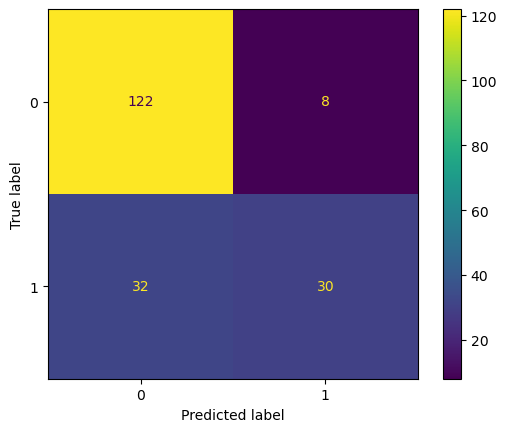

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [53]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192



In [60]:
error=[]
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred= knn.predict(X_test)
    error.append(np.mean(pred!=y_test))


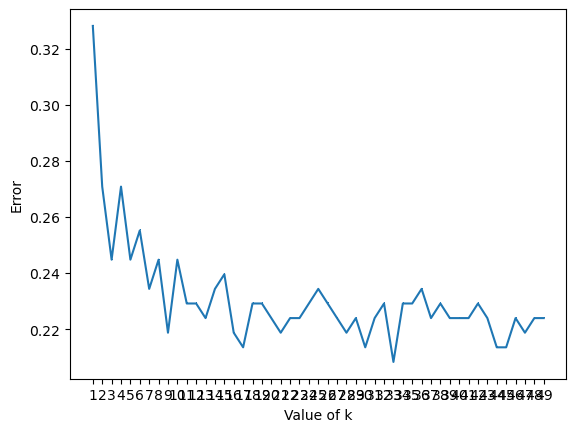

In [63]:
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.xticks(range(1,50))
plt.plot(range(1,50),error,marker=',')